In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0
%pylab inline
%load_ext autoreload
%autoreload 2

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0
Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
from ssl_neuron.datasets import GraphDataset, build_dataloader
from ssl_neuron.utils import plot_neuron, adjacency_to_neighbors

#### Load config

In [3]:
config = json.load(open('../configs/config.json'))

#### Load dataset

In [4]:
dset = GraphDataset(config, mode='val')

100%|██████████| 43/43 [00:00<00:00, 43.10it/s]


In [5]:
feat, neigh = dset.__getsingleitem__(0)

In [6]:
feat.shape, len(neigh)

((1000, 3), 1000)

#### Plot neuron

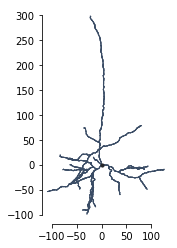

In [7]:
plot_neuron(neigh, feat)

#### Load dataloaders

In [8]:
train_loader, val_loader = build_dataloader(config)

100%|██████████| 43/43 [00:00<00:00, 50.63it/s]


In [9]:
features1, features2, adj_matrix1, adj_matrix2 = next(iter(train_loader))

In [10]:
neigh1 = adjacency_to_neighbors(adj_matrix1[0])
neigh2 = adjacency_to_neighbors(adj_matrix2[0])

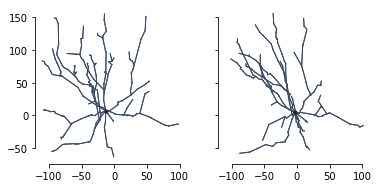

In [11]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

plot_neuron(neigh1, features1[0].numpy(), ax=ax[0])
plot_neuron(neigh2, features2[0].numpy(), ax=ax[1])